# Instalación de paquetes necesarios

In [56]:
!pip install --upgrade imutils

# Descargue el archivo zip del código

In [57]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/facial-landmarks/facial-landmarks.zip
!unzip -qq facial-landmarks.zip
%cd facial-landmarks

--2024-05-02 04:22:17--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/facial-landmarks/facial-landmarks.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.92.136.202, 52.92.237.138, 3.5.84.112, ...
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.92.136.202|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74572347 (71M) [binary/octet-stream]
Saving to: ‘facial-landmarks.zip’

facial-landmarks.zi 100%[===================>]  71.12M  33.6MB/s    in 2.1s    

2024-05-02 04:22:20 (33.6 MB/s) - ‘facial-landmarks.zip’ saved [74572347/74572347]

/content/facial-landmarks/facial-landmarks/facial-landmarks/facial-landmarks


In [125]:
import shutil
import os

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Definir las rutas de origen y destino
source_file = '/content/facial-landmarks/shape_predictor_68_face_landmarks.dat'  # Cambia 'tu_archivo_a_copiar.txt' al nombre de tu archivo
destination_folder = '/content/drive/MyDrive/Somnolencia'  # Cambia 'tu_carpeta_destino' a la ruta de la carpeta de destino en tu Google Drive

# Verificar si la carpeta de destino existe, de lo contrario, crearla
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Copiar el archivo a la carpeta de destino en Google Drive
shutil.copy(source_file, destination_folder)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Somnolencia/shape_predictor_68_face_landmarks.dat'

#Código de publicación del blog

##Importar paquetes

In [62]:
# Importe los paquetes necesarios
from matplotlib import pyplot as plt
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2

##Función para mostrar imágenes en Jupyter Notebooks y Google Colab

In [1]:
def plt_imshow(title, image):
  # convertir el marco de imagen BGR al espacio de color RGB y mostrarlo
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

##Puntos de referencia faciales con dlib, OpenCV y Python

In [65]:
args = {
	"shape_predictor": "shape_predictor_68_face_landmarks.dat",
	"image": "images/example_01.jpg"
}

In [45]:
# Montamos nuestro Google Drive en Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [99]:
# inicializamos el detector de rostros de dlib (basado en HOG) y luego creamos
# el predictor de puntos de referencia facial
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(args["shape_predictor"])

# cargar la imagen de entrada, cambiar su tamaño y convertirla a escala de grises
img ="/content/drive/MyDrive/Somnolencia/frames/frame_0000.jpg"
# img ="/content/drive/MyDrive/bryan_m.jpg"
# image = cv2.imread(args["image"])
image = cv2.imread(img)
# image = imutils.resize(image, width = 500)
# image = cv2.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detectar rostros en la imagen en escala de grises
rects = detector(gray, 1)
# Inicializar una lista para almacenar los puntos de referencia faciales de todos los rostros detectados
all_facial_landmarks = []

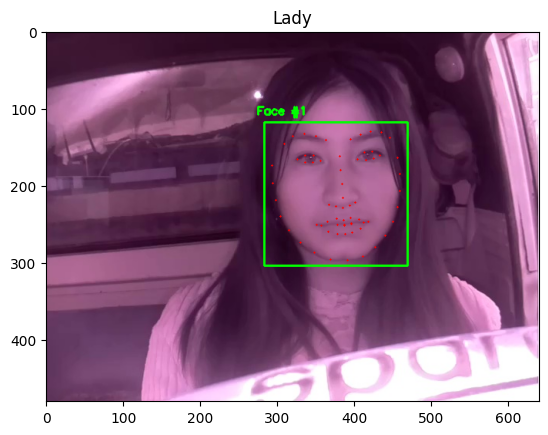

[array([[293, 174],
       [294, 197],
       [298, 219],
       [304, 240],
       [315, 258],
       [330, 274],
       [348, 287],
       [369, 296],
       [391, 297],
       [411, 292],
       [427, 280],
       [440, 265],
       [450, 247],
       [456, 228],
       [459, 207],
       [459, 185],
       [456, 164],
       [309, 146],
       [320, 136],
       [335, 133],
       [350, 136],
       [363, 141],
       [395, 140],
       [408, 134],
       [421, 130],
       [435, 131],
       [446, 138],
       [381, 162],
       [382, 180],
       [384, 198],
       [385, 216],
       [367, 225],
       [376, 227],
       [385, 229],
       [394, 226],
       [401, 222],
       [326, 166],
       [336, 161],
       [347, 161],
       [356, 168],
       [346, 170],
       [336, 170],
       [404, 166],
       [413, 157],
       [423, 156],
       [433, 161],
       [425, 165],
       [415, 167],
       [351, 251],
       [365, 247],
       [377, 243],
       [386, 245],
       [395

In [100]:

# loop over the face detections
for (i, rect) in enumerate(rects):
	# determine the facial landmarks for the face region, then
	# convert the facial landmark (x, y)-coordinates to a NumPy
	# array
	shape = predictor(gray, rect)
	shape = face_utils.shape_to_np(shape)
	# Agregar los puntos de referencia faciales a la lista
	all_facial_landmarks.append(shape)
	# convert dlib's rectangle to a OpenCV-style bounding box
	# [i.e., (x, y, w, h)], then draw the face bounding box
	(x, y, w, h) = face_utils.rect_to_bb(rect)
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

	# show the face number
	cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

	# loop over the (x, y)-coordinates for the facial landmarks
	# and draw them on the image
	for (x, y) in shape:
		cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

# show the output image with the face detections + facial landmarks
plt_imshow("Lady", image)
# print(all_facial_landmarks)

In [123]:
def guardarPuntosFaciales(filename, puntosFaciales):
    with open(filename, 'w') as f:
        # Escribir metadatos del archivo
        f.write("version: 1\n")
        # Obtener la longitud total de los puntos faciales
        num_puntos = sum(len(arreglo) for arreglo in puntosFaciales)
        f.write(f"n_points: {num_puntos}\n")
        f.write("{\n")

        # Escribir las coordenadas de los puntos de referencia faciales
        for puntos in puntosFaciales:
            for (x, y) in puntos:
                f.write(f"{x} {y}\n")

        f.write("}\n")
    print("Operación realizada con éxito")


In [124]:
guardarPuntosFaciales("frame_0000.pts", all_facial_landmarks)

68
